In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_CNN = pd.read_csv("data/SimpleCNN_cd-hit0_full/metrics.csv")
df_mlp = pd.read_csv("data/SimpleMLP_cd-hit0_full/metrics.csv")
df_seq2pp = pd.read_csv("data/Seq2Motif_cd-hit0_full/metrics.csv")
df_enc = pd.read_csv("data/SeqEncoder_cd-hit0_full/metrics.csv")

In [4]:
# 1. Agregar columna para identificar el origen/modelo
df_CNN = df_CNN.assign(model='CNN')
df_mlp = df_mlp.assign(model='MLP')
df_seq2pp = df_seq2pp.assign(model='seq2pp')
df_enc = df_enc.assign(model='Encoder')
# 2. Concatenar todos los DataFrames
df_all = pd.concat(
    [df_CNN,
     df_mlp,
     df_seq2pp,
     df_enc],
    axis=0,
    ignore_index=True,
    sort=False,  # sort=False para mantener el orden original de las columnas
)

cols = ["model"] + [c for c in df_all.columns if c != "model"]
df_all = df_all[cols]

In [5]:
df_all

,model,run_name,exp,run,arc_features,arc_kernels,arc_num_params,train_loss,valid_loss,test_loss,...,train_Accuracy,valid_Accuracy,test_Accuracy,train_Accuracy_seq,valid_Accuracy_seq,test_Accuracy_seq,arc_skip,arc_encoder_blocks,arc_num_conv,arc_latent_volume
0,CNN,scnn_k3_f64_64_64,SimpleCNN_cd-hit0_full,scnn_k3_f64_64_64,"[64, 64, 64]","[3, 3, 3]",25985,0.063812,0.086420,0.081939,...,0.747250,0.696995,0.675971,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,CNN,scnn_k3_f32_64_64,SimpleCNN_cd-hit0_full,scnn_k3_f32_64_64,"[32, 64, 64]","[3, 3, 3]",19361,0.064617,0.088066,0.082224,...,0.743925,0.686458,0.683224,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,CNN,scnn_k3_f32_32_64,SimpleCNN_cd-hit0_full,scnn_k3_f32_32_64,"[32, 32, 64]","[3, 3, 3]",10049,0.067018,0.088135,0.082398,...,0.732578,0.685854,0.669246,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,CNN,scnn_k3_f32_32_32,SimpleCNN_cd-hit0_full,scnn_k3_f32_32_32,"[32, 32, 32]","[3, 3, 3]",6849,0.068358,0.088721,0.082261,...,0.725281,0.681069,0.673619,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,CNN,scnn_k3_f16_64_64,SimpleCNN_cd-hit0_full,scnn_k3_f16_64_64,"[16, 64, 64]","[3, 3, 3]",16049,0.065400,0.087998,0.082105,...,0.739311,0.686991,0.677517,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Encoder,enc_f4_64,SeqEncoder_cd-hit0_full,enc_f4_64,"[4, 64]",NaN,8402745,0.122622,0.169683,0.141626,...,0.672401,0.611385,0.641240,0.0,0.0,0.0,NaN,NaN,2.0,NaN
246,Encoder,enc_f4_32,SeqEncoder_cd-hit0_full,enc_f4_32,"[4, 32]",NaN,4198617,0.151893,0.191718,0.160519,...,0.595980,0.564011,0.593550,0.0,0.0,0.0,NaN,NaN,2.0,NaN
247,Encoder,enc_f4_16,SeqEncoder_cd-hit0_full,enc_f4_16,"[4, 16]",NaN,2098857,0.032889,0.128332,0.091336,...,0.903429,0.681864,0.674357,0.0,0.0,0.0,NaN,NaN,2.0,NaN
248,Encoder,enc_f4_8,SeqEncoder_cd-hit0_full,enc_f4_8,"[4, 8]",NaN,1049553,0.028071,0.134960,0.100254,...,0.920965,0.673756,0.675056,0.0,0.0,0.0,NaN,NaN,2.0,NaN


Estadísticas de train_Accuracy


,count,mean,std,50%,min,max
model,,,,,,
CNN,50.0,0.700247,0.023222,0.693527,0.666098,0.747250
Encoder,50.0,0.774017,0.161736,0.851797,0.539599,0.953919
MLP,50.0,0.649011,0.036858,0.655111,0.543935,0.700414
seq2pp,100.0,0.782663,0.049268,0.785906,0.688683,0.879682


Estadísticas de valid_Accuracy


,count,mean,std,50%,min,max
model,,,,,,
CNN,50.0,0.670434,0.010778,0.666921,0.653855,0.696995
Encoder,50.0,0.635309,0.063110,0.672470,0.521200,0.712293
MLP,50.0,0.605018,0.031240,0.606880,0.520602,0.646414
seq2pp,100.0,0.709642,0.024266,0.713480,0.655141,0.759320


Estadísticas de test_Accuracy


,count,mean,std,50%,min,max
model,,,,,,
CNN,50.0,0.658684,0.011038,0.657004,0.640894,0.683224
Encoder,50.0,0.646011,0.048248,0.674339,0.553786,0.704231
MLP,50.0,0.640983,0.029092,0.645887,0.553773,0.677189
seq2pp,100.0,0.698714,0.019634,0.700671,0.654470,0.730087


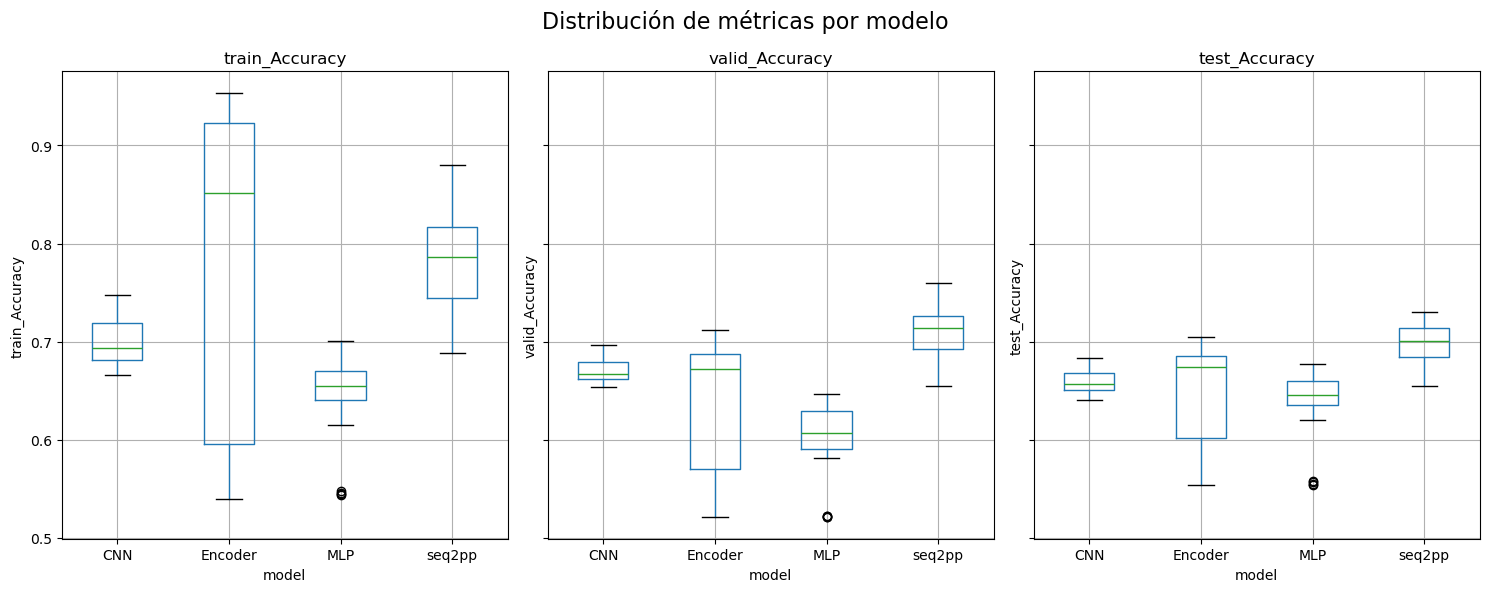

In [ ]:
stats = {}
fig, ax = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
for i, metric in enumerate(["train_Accuracy", "valid_Accuracy", "test_Accuracy"]):

    stats[metric] = df_all.groupby("model")[metric].describe()[
        ["count", "mean", "std", "50%", "min", "max"]
    ]
    print(f"Estadísticas de {metric}")
    display(stats[metric])

    df_all.boxplot(column=metric, by="model", ax=ax[i])
    ax[i].set_title(f"{metric}")
    ax[i].set_ylabel(f"{metric}")
fig.suptitle("Distribución de métricas por modelo", fontsize=16)
fig.tight_layout()
# plt.grid()
plt.show()

In [19]:
df_all['limit'] = 512

Estadísticas de train_Accuracy


,count,mean,std,50%,min,max
model,,,,,,
CNN,50.0,0.700247,0.023222,0.693527,0.666098,0.747250
Encoder,50.0,0.774017,0.161736,0.851797,0.539599,0.953919
MLP,50.0,0.649011,0.036858,0.655111,0.543935,0.700414
seq2pp,100.0,0.782663,0.049268,0.785906,0.688683,0.879682


Estadísticas de valid_Accuracy


,count,mean,std,50%,min,max
model,,,,,,
CNN,50.0,0.670434,0.010778,0.666921,0.653855,0.696995
Encoder,50.0,0.635309,0.063110,0.672470,0.521200,0.712293
MLP,50.0,0.605018,0.031240,0.606880,0.520602,0.646414
seq2pp,100.0,0.709642,0.024266,0.713480,0.655141,0.759320


Estadísticas de test_Accuracy


,count,mean,std,50%,min,max
model,,,,,,
CNN,50.0,0.658684,0.011038,0.657004,0.640894,0.683224
Encoder,50.0,0.646011,0.048248,0.674339,0.553786,0.704231
MLP,50.0,0.640983,0.029092,0.645887,0.553773,0.677189
seq2pp,100.0,0.698714,0.019634,0.700671,0.654470,0.730087


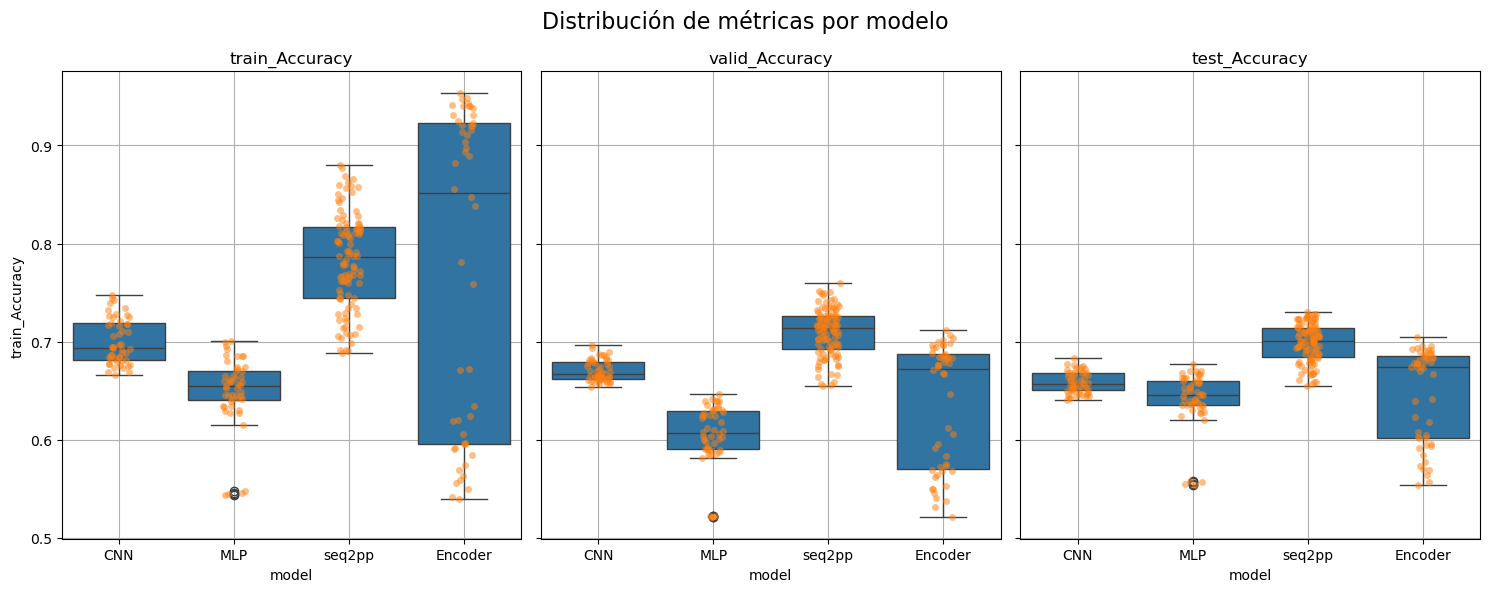

In [18]:
stats = {}
fig, ax = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
legend = False
for i, metric in enumerate(["train_Accuracy", "valid_Accuracy", "test_Accuracy"]):
    if i == 2:
        legend = True
    stats[metric] = df_all.groupby("model")[metric].describe()[
        ["count", "mean", "std", "50%", "min", "max"]
    ]
    print(f"Estadísticas de {metric}")
    display(stats[metric])

    sns.boxplot(data=df_all, x="model", y=metric, ax=ax[i], legend=legend)
    sns.stripplot(
        data=df_all, x="model", y=metric, ax=ax[i], alpha=0.5, legend=False
    )
    ax[i].grid()
    ax[i].set_title(f"{metric}")
    ax[i].set_ylabel(f"{metric}")
fig.suptitle("Distribución de métricas por modelo", fontsize=16)
fig.tight_layout()
# plt.grid()
plt.show()

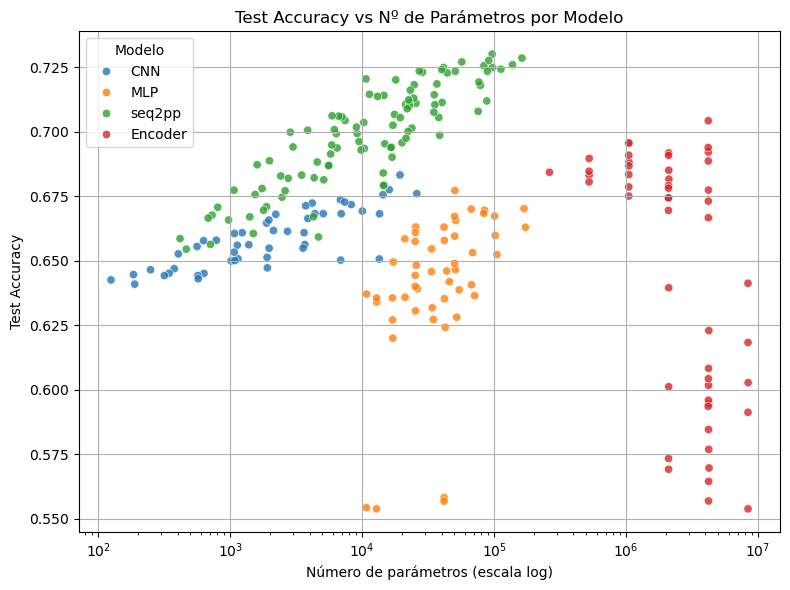

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_all, x="arc_num_params", y="test_Accuracy", hue="model", alpha=0.8
)
plt.xscale("log")
plt.xlabel("Número de parámetros (escala log)")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs Nº de Parámetros por Modelo")
plt.legend(title="Modelo")
plt.tight_layout()
plt.grid()
plt.show()

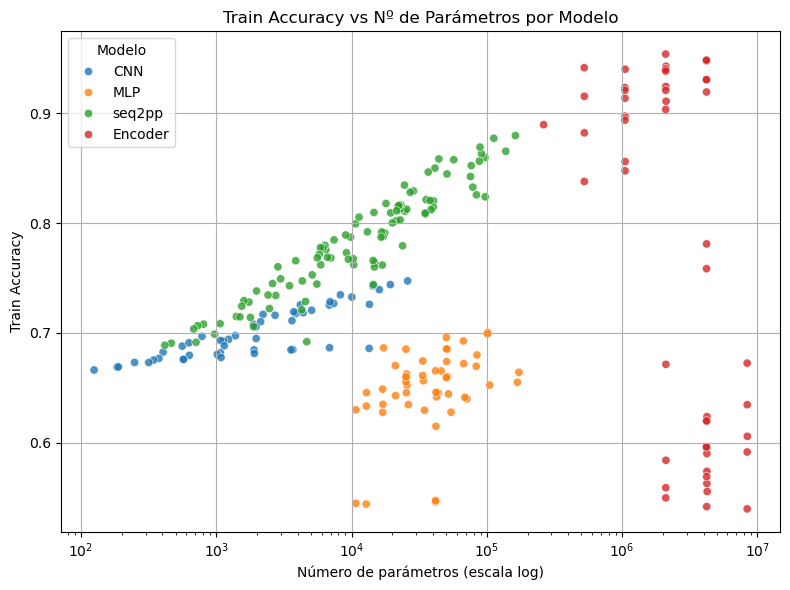

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_all, x="arc_num_params", y="train_Accuracy", hue="model", alpha=0.8
)
plt.xscale("log")
plt.xlabel("Número de parámetros (escala log)")
plt.ylabel("Train Accuracy")
plt.title("Train Accuracy vs Nº de Parámetros por Modelo")
plt.legend(title="Modelo")
plt.tight_layout()
plt.grid()
plt.show()

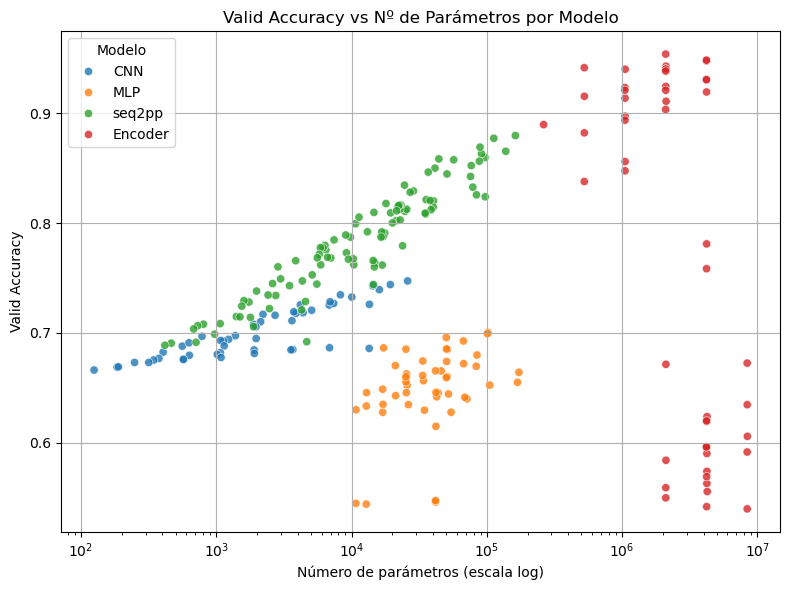

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_all, x="arc_num_params", y="train_Accuracy", hue="model", alpha=0.8
)
plt.xscale("log")
plt.xlabel("Número de parámetros (escala log)")
plt.ylabel("Valid Accuracy")
plt.title("Valid Accuracy vs Nº de Parámetros por Modelo")
plt.legend(title="Modelo")
plt.tight_layout()
plt.grid()
plt.show()

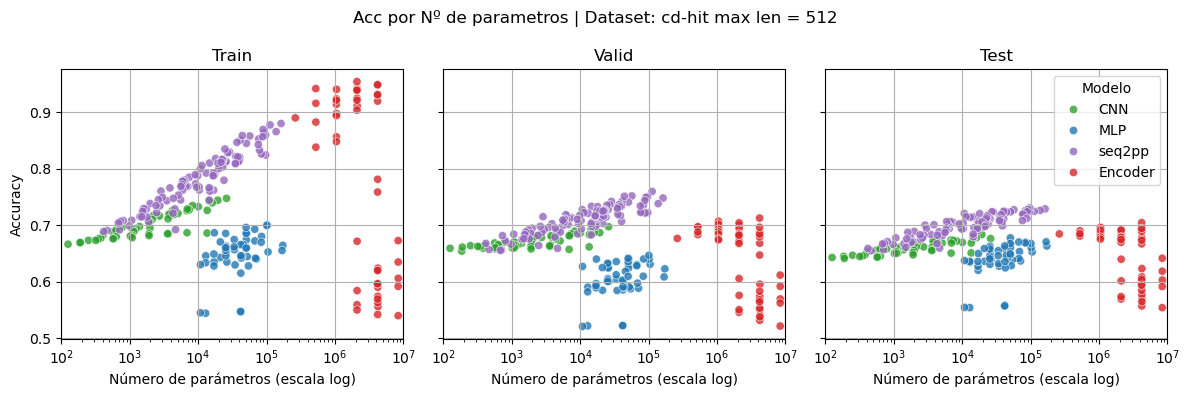

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
model_colors = {
    "MLP": "#1f77b4",  # azul
    "CNN": "#2ca02c",  # verde
    "Encoder": "#d62728",  # rojo
    "seq2pp": "#9467bd",  # púrpura
}

# Definir ejes y métricas
fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey=True, sharex=True)
splits = ["train", "valid", "test"]
ax[0].set_xlim(100, 10**7)
for i, split in enumerate(splits):
    sns.scatterplot(
        data=df_all,
        x="arc_num_params",
        y=f"{split}_Accuracy",
        hue="model",
        palette=model_colors,
        alpha=0.8,
        ax=ax[i],
        legend=(i == 2),  # Solo el último subplot tiene leyenda
    )
    ax[i].set_xscale("log")
    ax[i].set_xlabel("Número de parámetros (escala log)")
    ax[i].set_ylabel("Accuracy")
    ax[i].set_title(split.capitalize())
    ax[i].grid()

ax[2].legend(title="Modelo")
fig.suptitle('Acc por Nº de parametros | Dataset: cd-hit max len = 512')
fig.tight_layout()
plt.show()


In [15]:
for model, color in model_colors.items():
    print(f"{model}: {color}")

CNN: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
MLP: (1.0, 0.4980392156862745, 0.054901960784313725)
seq2pp: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)
Encoder: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)


In [22]:
df_128 = pd.read_csv('data/join_cd-hit_limit128.csv')
df_ = pd.concat([df_all, df_128])

Estadísticas de train_Accuracy


,count,mean,std,50%,min,max
model,,,,,,
CNN,50.0,0.700247,0.023222,0.693527,0.666098,0.747250
Encoder,50.0,0.774017,0.161736,0.851797,0.539599,0.953919
MLP,50.0,0.649011,0.036858,0.655111,0.543935,0.700414
seq2pp,100.0,0.782663,0.049268,0.785906,0.688683,0.879682


Estadísticas de valid_Accuracy


,count,mean,std,50%,min,max
model,,,,,,
CNN,50.0,0.670434,0.010778,0.666921,0.653855,0.696995
Encoder,50.0,0.635309,0.063110,0.672470,0.521200,0.712293
MLP,50.0,0.605018,0.031240,0.606880,0.520602,0.646414
seq2pp,100.0,0.709642,0.024266,0.713480,0.655141,0.759320


Estadísticas de test_Accuracy


,count,mean,std,50%,min,max
model,,,,,,
CNN,50.0,0.658684,0.011038,0.657004,0.640894,0.683224
Encoder,50.0,0.646011,0.048248,0.674339,0.553786,0.704231
MLP,50.0,0.640983,0.029092,0.645887,0.553773,0.677189
seq2pp,100.0,0.698714,0.019634,0.700671,0.654470,0.730087


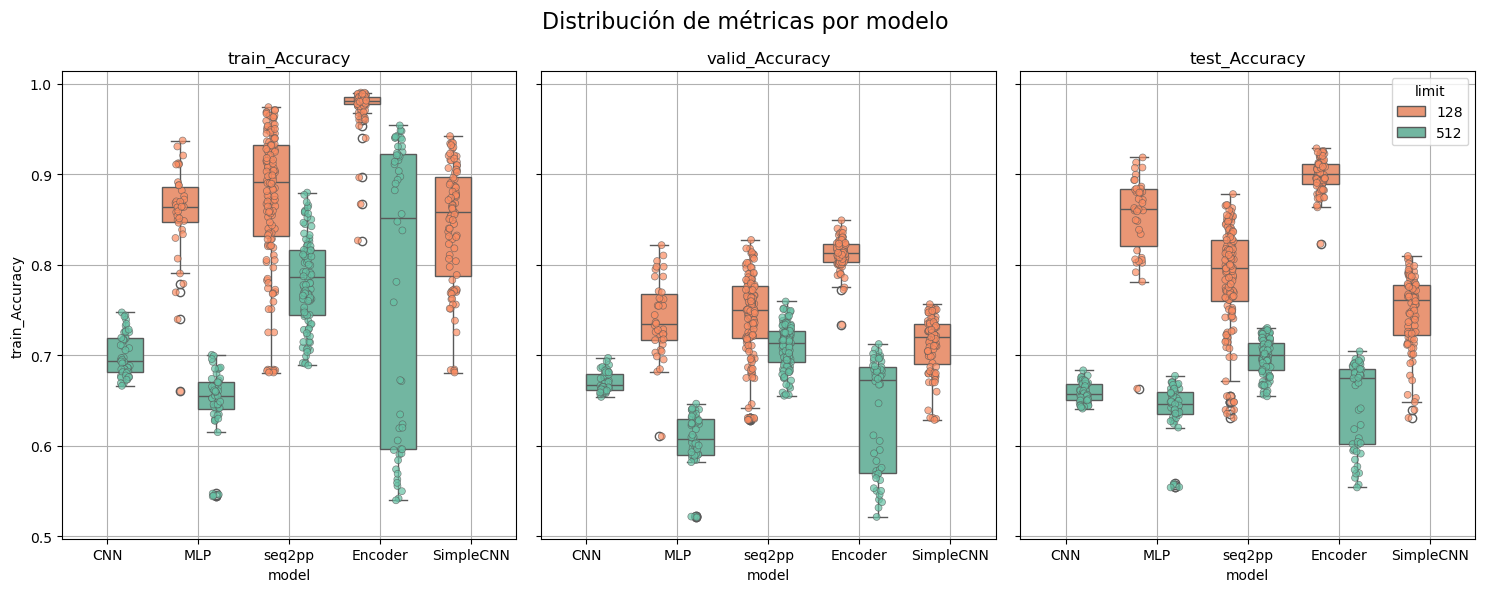

In [31]:
custom_palette = {
    512: "#66c2a5",  # verde claro
    128: "#fc8d62",  # naranja
}
sns.set_palette("Set2")
fig, ax = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
legend = False
for i, metric in enumerate(["train_Accuracy", "valid_Accuracy", "test_Accuracy"]):
    if i == 2:
        legend = True
    print(f"Estadísticas de {metric}")
    display(stats[metric])

    sns.boxplot(data=df_, x="model", y=metric, hue="limit", ax=ax[i], legend=legend, palette=custom_palette)
    sns.stripplot(
        data=df_, x="model", y=metric, hue="limit", ax=ax[i], legend=False,
        alpha=0.7, dodge=True, marker="o", edgecolor="auto", linewidth=0.5, palette=custom_palette
    )
    ax[i].grid()
    ax[i].set_title(f"{metric}")
    ax[i].set_ylabel(f"{metric}")
fig.suptitle("Distribución de métricas por modelo", fontsize=16)
fig.tight_layout()
# plt.grid()
plt.show()